### CellStrat Hub Pack - Machine Learning

#### ML4 - Linear and Polynomial Regression

In [1]:
# coding: utf-8

# **Regression – Training Linear Models**

# Source Credit : “Hands-on Machine Learning with Scikit-Learn and TensorFlow ” by Aurelien Geron

# # Setup

# First, let's make sure this notebook works well in both python 2 and 3, import a few common modules,
# ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# To plot pretty figures
#get_ipython().magic('matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [5]:
# # Linear regression using the Normal Equation


import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

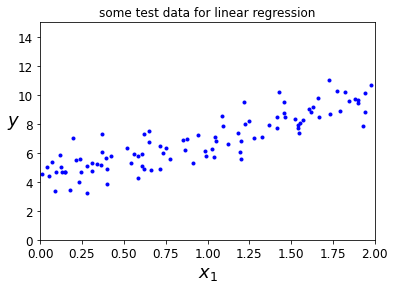

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.savefig("generated_data_plot")
plt.title("some test data for linear regression")
plt.show()

In [7]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [8]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
#y = w0*x0 + w1*x1 = w0 + w1*x1
#y = W.X

print(X_b)

[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]
 [1.         1.41614516]
 [1.         0.04116899]
 [1.         1.9398197 ]
 [1.         1.66488528]
 [1.         0.42467822]
 [1.         0.36364993]
 [1.         0.36680902]
 [1.         0.60848449]
 [1.         1.04951286]
 [1.         0.86389004]
 [1.         0.58245828]
 [1.         1.22370579]
 [1.         0.27898772]
 [1.         0.5842893 ]
 [1.         0.73272369]
 [1.         0.91213997]
 [1.         1.57035192]
 [1.         0.39934756]
 [1.         1.02846888]
 [1.         1.18482914]
 [1.         0.09290083]
 [1.         1.2150897 ]
 [1.         0.34104825]
 [1.         0.13010319]
 [1.         1.89777107]
 [1.         1.93126407]
 [1.         1.6167947 ]
 [1.         0.60922754]
 [1.         0.19534423]
 [1.         1.36846605]
 [1.         0.88030499]


In [9]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#by using the normal equation : w = (XT.X)-1.XT.y
#linalg.inv : Compute the (multiplicative) inverse of a matrix.
#API reference https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html

theta_best

array([[4.21509616],
       [2.77011339]])

In [10]:
#now test with new x_new values
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


array([[4.21509616],
       [9.75532293]])

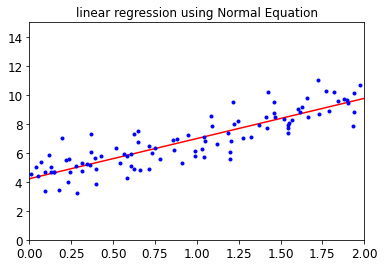

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.title("linear regression using Normal Equation")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

lin_reg.predict(X_new)

[4.21509616]
[[2.77011339]]


array([[4.21509616],
       [9.75532293]])

In [13]:
# # Linear regression using batch gradient descent


eta = 0.1   #learning rate
n_iterations = 1000
m = 100     #no of samples
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)      
    #dJ/dw = (sum of X(y'-y) for m samples)/m. The digit 2 comes from taking differential of square
    theta = theta - eta * gradients
    #w = w - learning_rate*dJ/dw

In [14]:
theta
print("")
print("theta :-")
print(theta)
print("")

X_new_b.dot(theta)


theta :-
[[4.21509616]
 [2.77011339]]



array([[4.21509616],
       [9.75532293]])

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("gradient descent "+r"$\eta = {}$".format(eta), fontsize=16)


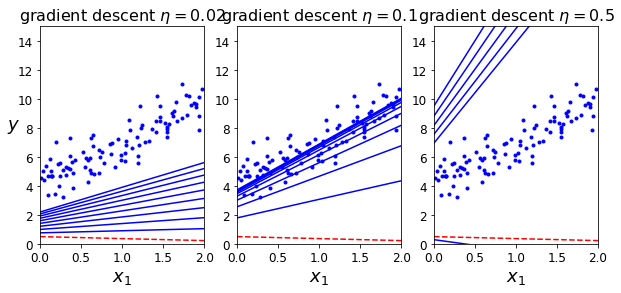

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.savefig("gradient_descent_plot")
plt.show()

In [17]:
# # Stochastic Gradient Descent


theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

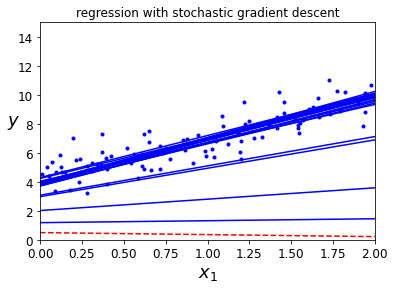

In [18]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.title("regression with stochastic gradient descent")
plt.savefig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
#from sklearn.linear_model import SGDRegressor
#sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1, random_state=42)
#sgd_reg.fit(X, y.ravel())

In [21]:
#sgd_reg.intercept_, sgd_reg.coef_

In [22]:
# # Mini-batch gradient descent


theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

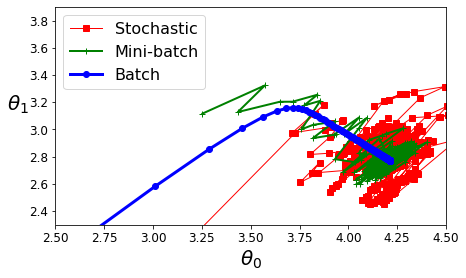

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.savefig("gradient_descent_paths_plot")
plt.show()

#### Polynomial Regression

In [26]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [27]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
#y = 0.5 * X**2 + X + 2
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

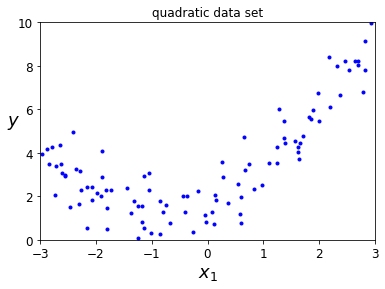

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic data set")
plt.savefig("quadratic_data_plot")
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [30]:
print(X_poly[0])

[-0.75275929  0.56664654]


In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

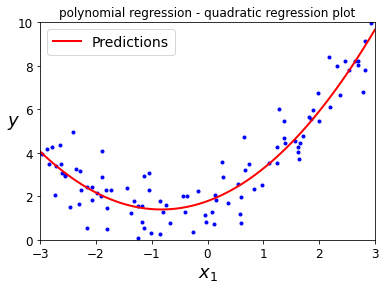

In [32]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("polynomial regression - quadratic regression plot")
plt.savefig("quadratic_predictions_plot")
plt.show()

In [33]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline

#for style, width, degree in (("g-", 1, 10), ("b--", 2, 2), ("r-+", 2, 1)):
#    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
#    std_scaler = StandardScaler()
#    lin_reg = LinearRegression()
#    polynomial_regression = Pipeline((
#            ("poly_features", polybig_features),
#            ("std_scaler", std_scaler),
#            ("lin_reg", lin_reg),
#        ))
#    print("")
#    print("X :-")
#    print(X)
#    print("")
#    print("y :-")
#    print(y)
#    print("")
#    polynomial_regression.fit(list(X), list(y))
#    y_newbig = polynomial_regression.predict(X_new)
#    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

#plt.plot(X, y, "b.", linewidth=3)
#plt.legend(loc="upper left")
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
#plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

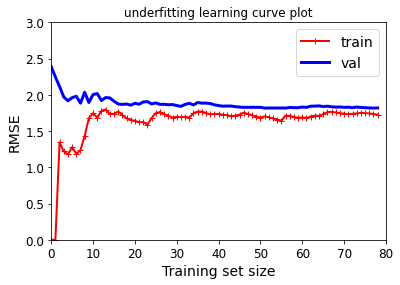

In [35]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown
plt.title("underfitting learning curve plot")
plt.savefig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

In [36]:
#from sklearn.pipeline import Pipeline

#polynomial_regression = Pipeline((
#        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
#        ("lin_reg", LinearRegression()),
#    ))

#plot_learning_curves(polynomial_regression, X, y)
#plt.axis([0, 80, 0, 3])           # not shown
#plt.title("learning curve plots")
#save_fig("learning_curves_plot")  # not shown
#plt.show()                        # not shown